<a href="https://colab.research.google.com/github/GarvinAgweli/personal/blob/main/Bank_Loan_Approval_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split,StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import  precision_recall_curve, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import xgboost as xgb
import statsmodels.api as sm
import pickle
import gc
from sklearn import svm

In [129]:
#Data Loading
df=pd.read_csv('bankloan.csv')
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [130]:
df.shape

(5000, 14)

In [131]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account',
       'CD.Account', 'Online', 'CreditCard'],
      dtype='object')

In [132]:
df.describe()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [134]:
# Define features (X) and target (Y)
X = df.drop('CreditCard', axis=1)
Y = df['CreditCard']

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=False)

In [135]:
X_train

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online
2913,2914,39,12,75,94501,3,2.33,2,0,0,0,0,1
3275,3276,32,8,65,95134,1,1.20,1,268,0,0,0,1
775,776,65,39,23,92835,3,0.70,2,0,0,0,0,0
217,218,39,14,74,94305,3,3.00,1,0,0,0,0,0
1245,1246,46,21,41,94025,1,1.40,3,128,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,4932,57,27,55,95616,1,1.40,3,0,0,0,0,1
3264,3265,67,41,114,95616,4,2.40,3,0,0,0,0,1
1653,1654,26,1,24,96651,2,0.90,3,123,0,0,0,0
2607,2608,57,33,49,94305,4,1.50,1,214,0,1,1,1


In [136]:
Y_train

,CreditCard
2913,1
3275,0
775,1
217,0
1245,0
...,...
4931,0
3264,0
1653,1
2607,1


In [137]:
pd1=X_train.join(Y_train)
pd1.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
2913,2914,39,12,75,94501,3,2.33,2,0,0,0,0,1,1
3275,3276,32,8,65,95134,1,1.20,1,268,0,0,0,1,0
775,776,65,39,23,92835,3,0.70,2,0,0,0,0,0,1
217,218,39,14,74,94305,3,3.00,1,0,0,0,0,0,0
1245,1246,46,21,41,94025,1,1.40,3,128,0,0,0,1,0


In [138]:
#Correlation
pd1.corr()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
ID,1.000000,-0.014351,-0.014063,-0.016272,0.018187,-0.012101,-0.027351,0.017243,-0.024429,-0.020438,-0.012602,0.006494,-0.002241,0.030834
Age,-0.014351,1.000000,0.994185,-0.066617,-0.034170,-0.048102,-0.062517,0.041666,-0.008755,-0.015975,0.003615,0.013493,0.014367,0.008478
Experience,-0.014063,0.994185,1.000000,-0.057773,-0.032422,-0.054312,-0.060784,0.011649,-0.006568,-0.015699,0.003749,0.016430,0.014856,0.010054
Income,-0.016272,-0.066617,-0.057773,1.000000,-0.020799,-0.159958,0.651870,-0.193228,0.191219,0.496913,-0.000421,0.151681,0.003995,-0.010819
ZIP.Code,0.018187,-0.034170,-0.032422,-0.020799,1.000000,0.005410,-0.010137,-0.018611,0.008187,-0.003737,0.011466,0.024820,0.016391,0.003494
Family,-0.012101,-0.048102,-0.054312,-0.159958,0.005410,1.000000,-0.111769,0.069386,-0.016108,0.060661,0.013232,0.012687,0.006503,0.018590
CCAvg,-0.027351,-0.062517,-0.060784,0.651870,-0.010137,-0.111769,1.000000,-0.145195,0.101690,0.364317,0.016197,0.115364,-0.014065,-0.020446
Education,0.017243,0.041666,0.011649,-0.193228,-0.018611,0.069386,-0.145195,1.000000,-0.032391,0.145049,-0.005219,0.013068,-0.022561,-0.014422
Mortgage,-0.024429,-0.008755,-0.006568,0.191219,0.008187,-0.016108,0.101690,-0.032391,1.000000,0.147267,-0.005529,0.069435,-0.013468,-0.008777
Personal.Loan,-0.020438,-0.015975,-0.015699,0.496913,-0.003737,0.060661,0.364317,0.145049,0.147267,1.000000,0.030727,0.300980,-0.006785,-0.008264


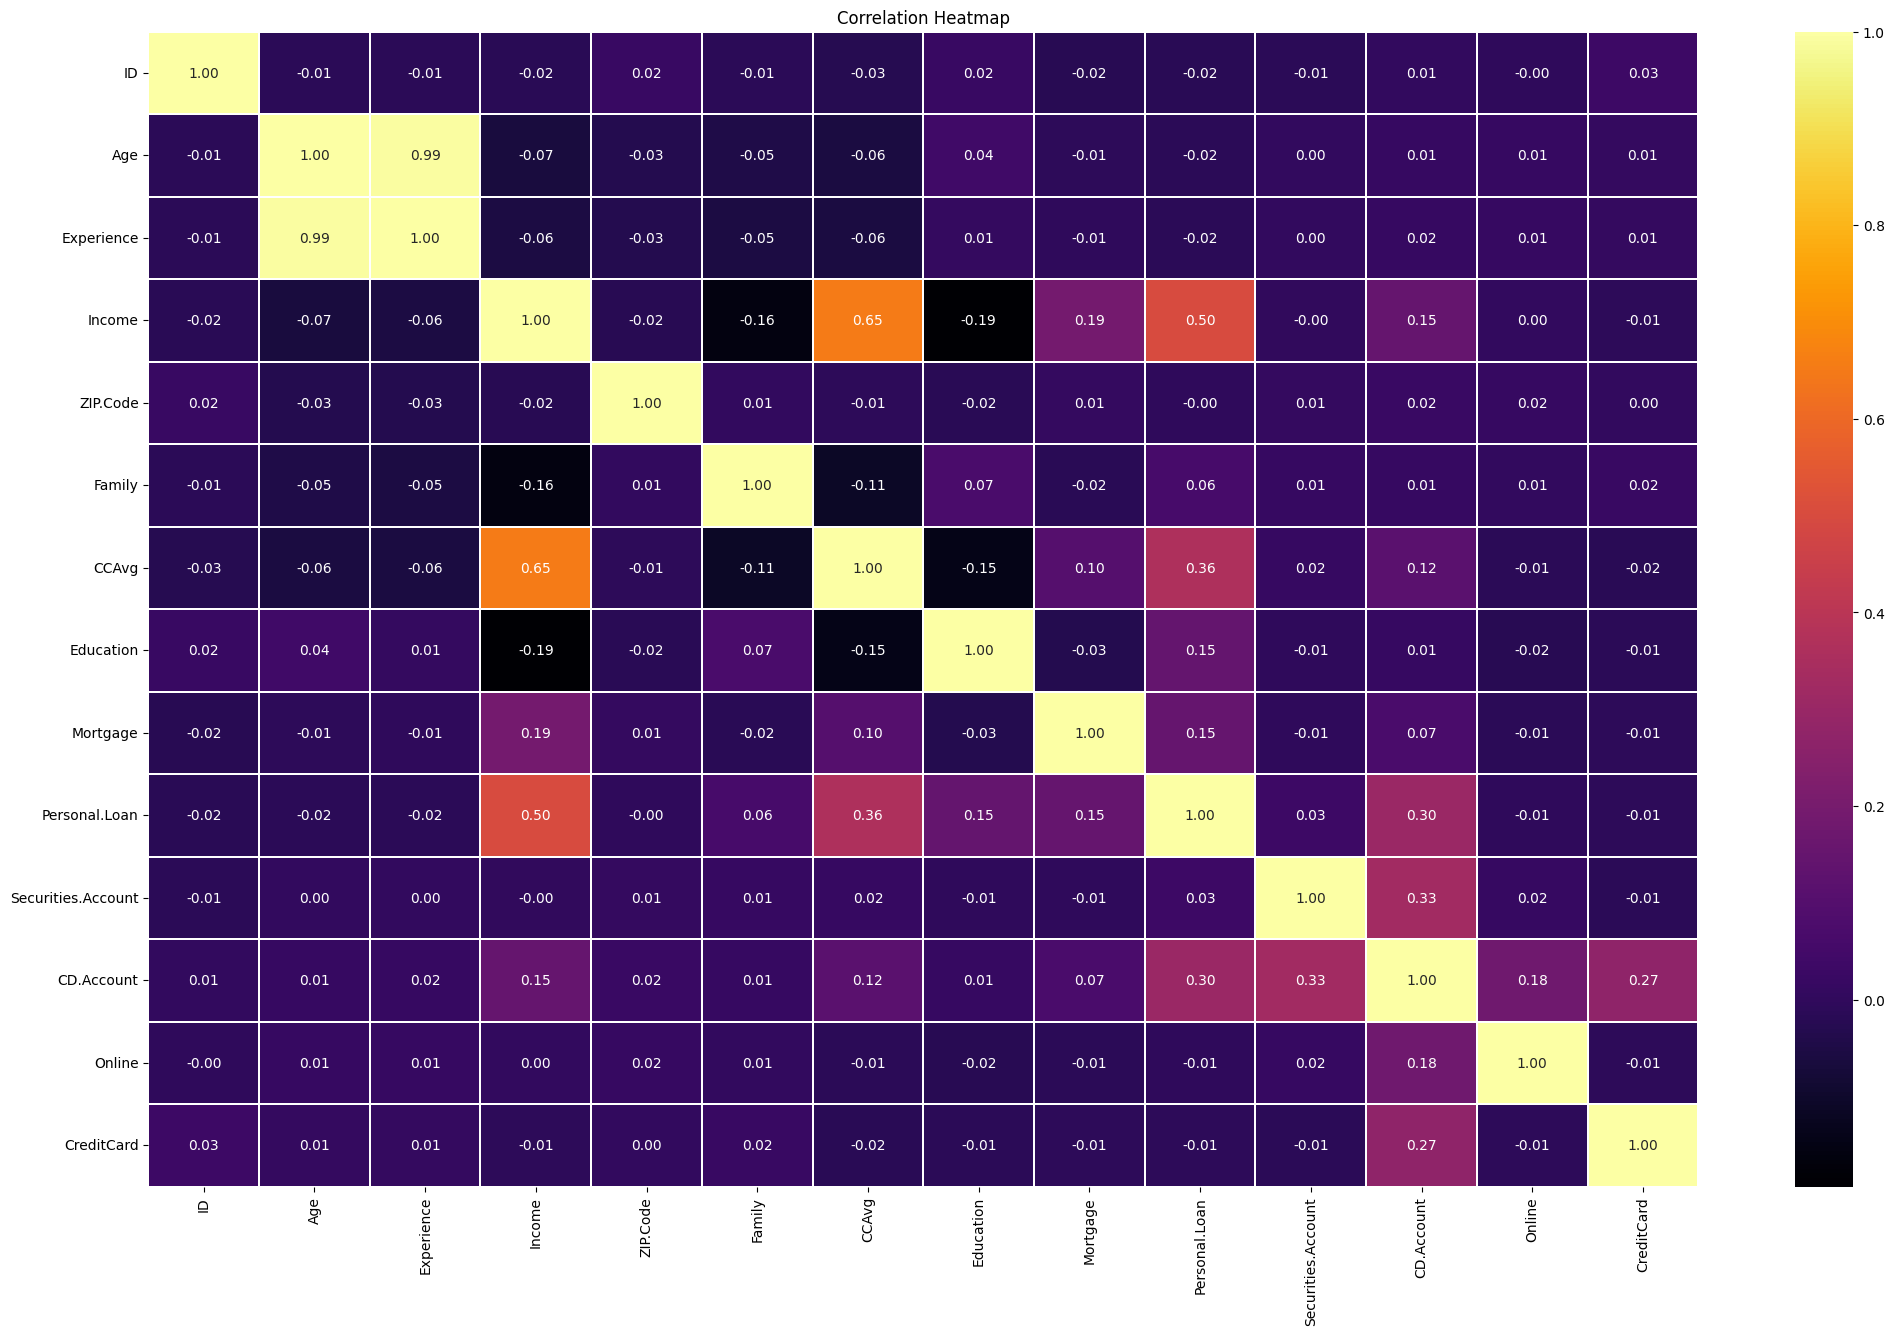

In [139]:
#Data Visualisation
plt.figure(figsize=(25,15))
sns.heatmap(pd1.corr(),annot=True,cmap='inferno',fmt='.2f',linewidths=0.1)
plt.title('Correlation Heatmap')
plt.show()

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'ZIP.Code'}>,
        <Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal.Loan'}>,
        <Axes: title={'center': 'Securities.Account'}>,
        <Axes: title={'center': 'CD.Account'}>],
       [<Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>, <Axes: >, <Axes: >]],
      dtype=object)

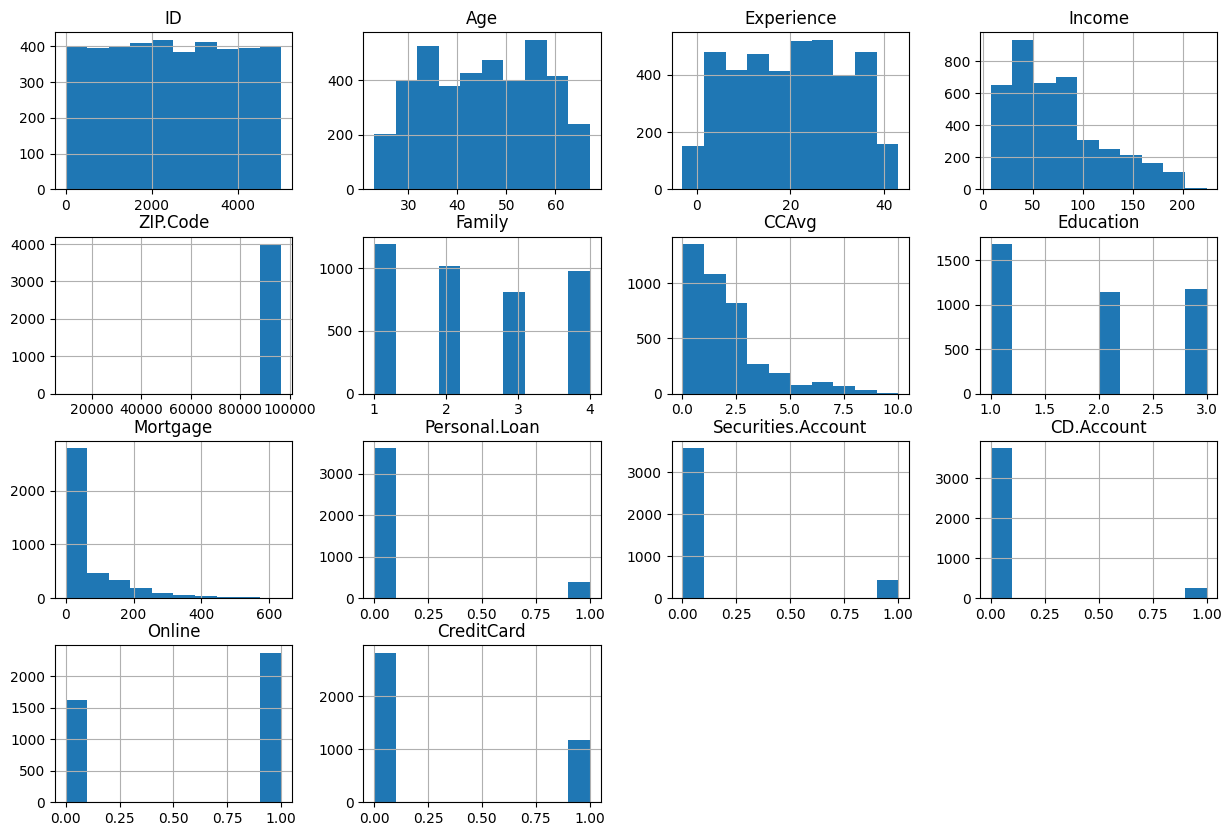

In [140]:
pd1.hist(figsize=(15,10))

In [141]:
pd1_value_counts = pd1["Personal.Loan"].value_counts()
print(pd1_value_counts)

Personal.Loan
0    3610
1     390
Name: count, dtype: int64


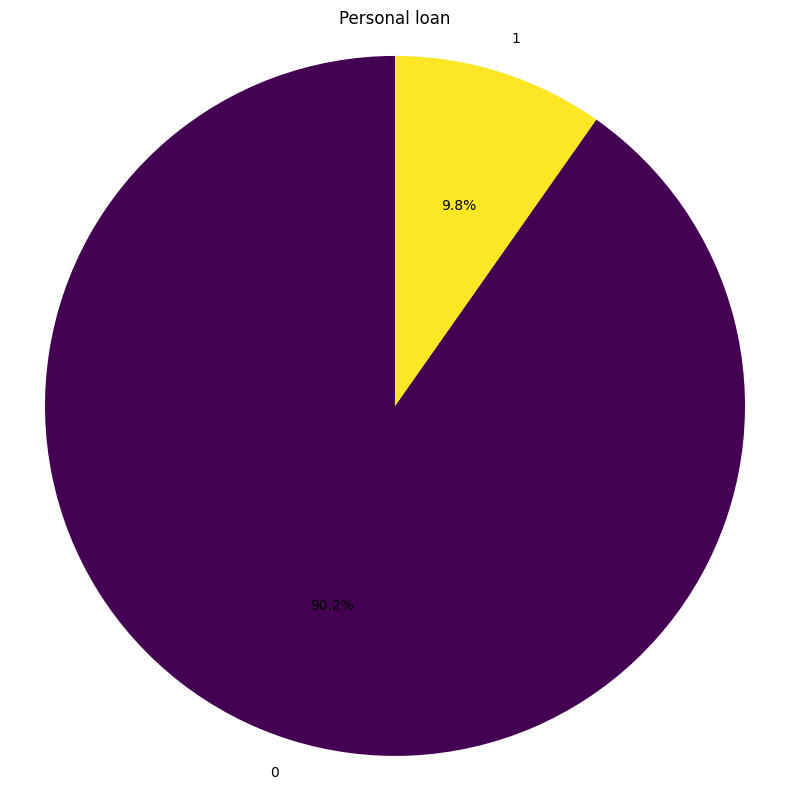

In [142]:
plt.figure(figsize=(8,8))
pd1_value_counts.plot(kind='pie',autopct='%1.1f%%',startangle=90,cmap='viridis')
plt.title('Personal loan')
plt.ylabel("")
plt.axis('equal')
plt.tight_layout()
plt.show()

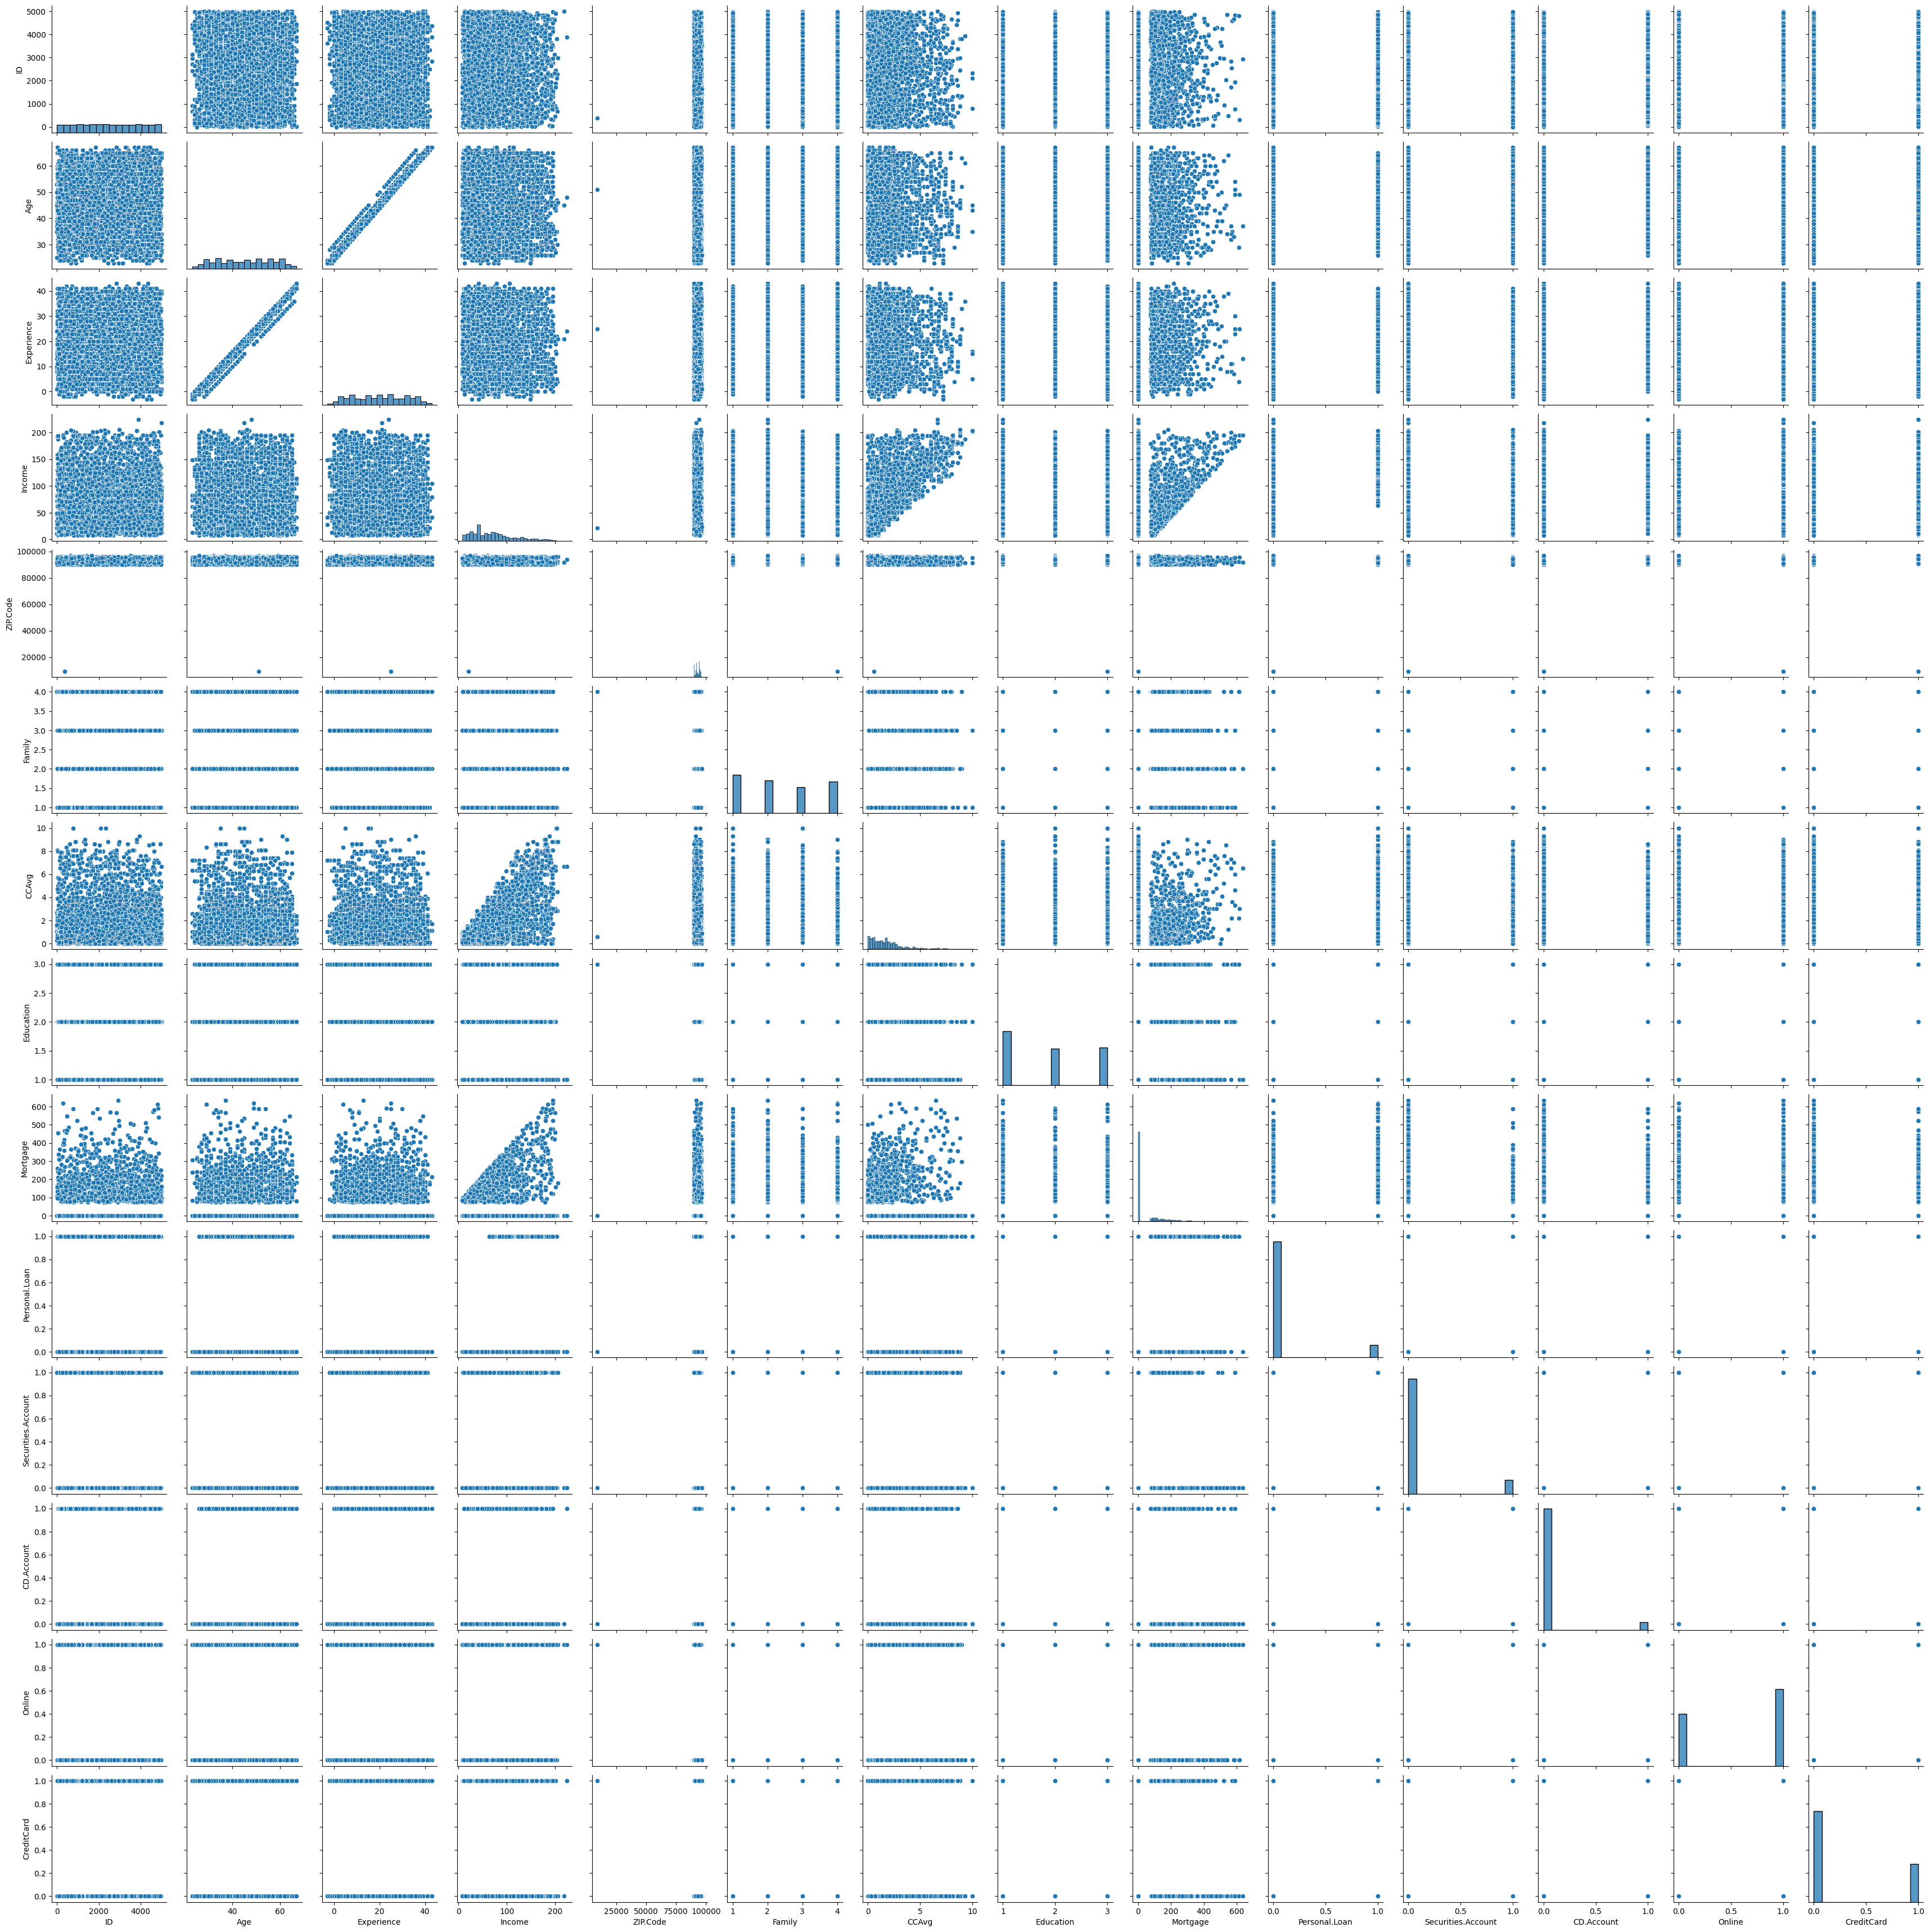

In [143]:
sns.pairplot(pd1)

In [144]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [145]:
X_test_scaled

array([[-1.45623735,  0.75615654,  0.86152469, ..., -0.34615145,
        -0.25432119, -1.21145061],
       [ 0.92737799, -1.0716225 , -0.96373949, ..., -0.34615145,
        -0.25432119,  0.82545668],
       [ 1.62337979,  0.75615654,  0.34002064, ..., -0.34615145,
        -0.25432119, -1.21145061],
       ...,
       [-1.18560853,  1.10430493,  1.20919406, ..., -0.34615145,
        -0.25432119, -1.21145061],
       [-0.72484563,  0.75615654,  0.68769001, ..., -0.34615145,
        -0.25432119,  0.82545668],
       [ 0.5332314 , -0.46236282, -0.52915278, ..., -0.34615145,
        -0.25432119,  0.82545668]])

In [146]:
X_train_scaled

array([[ 0.28897155, -0.54939992, -0.70298746, ..., -0.34615145,
        -0.25432119,  0.82545668],
       [ 0.5401706 , -1.1586596 , -1.05065683, ..., -0.34615145,
        -0.25432119,  0.82545668],
       [-1.19462949,  1.71356461,  1.64378077, ..., -0.34615145,
        -0.25432119, -1.21145061],
       ...,
       [-0.5853677 , -1.68088218, -1.65907822, ..., -0.34615145,
        -0.25432119, -1.21145061],
       [ 0.07663202,  1.01726783,  1.12227672, ...,  2.88890886,
         3.93203578,  0.82545668],
       [ 0.16337202, -1.0716225 , -0.96373949, ..., -0.34615145,
        -0.25432119, -1.21145061]])

In [147]:
#Logistic Regression
lr=LogisticRegression(max_iter=1000,)
lr.fit(X_train_scaled,Y_train)

LogisticRegression(max_iter=1000)

In [148]:
#Prediction
y_pred=lr.predict(X_test_scaled)
y_pred_proba=lr.predict_proba(X_test_scaled)

In [149]:
lr.score(X_train,Y_train)

0.7065

In [150]:
lr.score(X_test,Y_test)

0.704

In [151]:
#Evaluation of Metrics
print('Classification report:\n', classification_report(Y_test, y_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = Y_test, y_pred = y_pred))
print("Logistic Regression Accuracy: ",accuracy_score(Y_test,y_pred))
print('ROC AUC : ', roc_auc_score(Y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.88      0.17      0.29       296

    accuracy                           0.75      1000
   macro avg       0.81      0.58      0.57      1000
weighted avg       0.78      0.75      0.68      1000

Confusion matrix:
 [[697   7]
 [245  51]]
Logistic Regression Accuracy:  0.748
ROC AUC :  0.5811770577395579


In [152]:
#Random Forest
rf=RandomForestClassifier(n_estimators=100,max_depth=None,class_weight=None,random_state=42,n_jobs=-1)
rf.fit(X_test_scaled,Y_test)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [153]:
#Prediction
rf.fit(X_train_scaled,Y_train)
y_predicted = rf.predict(X_test_scaled)
y_predicted_proba = rf.predict_proba(X_test_scaled)

In [154]:
rf.score(X_train,Y_train)

0.70425

In [155]:
rf.score(X_test,Y_test)

0.703

In [156]:
#Evaluation of metrics
print("Classification report:\n", classification_report(Y_test, y_pred,digits=4))
print("Confusion matrix:\n",confusion_matrix(y_true = Y_test, y_pred = y_pred))
print(f"ROC AUC Score:{roc_auc_score(Y_test, y_pred):0.4f}")

Classification report:
               precision    recall  f1-score   support

           0     0.7399    0.9901    0.8469       704
           1     0.8793    0.1723    0.2881       296

    accuracy                         0.7480      1000
   macro avg     0.8096    0.5812    0.5675      1000
weighted avg     0.7812    0.7480    0.6815      1000

Confusion matrix:
 [[697   7]
 [245  51]]
ROC AUC Score:0.5812


In [164]:
#Comparisson of Models
models={
    "Logistic Regression":LogisticRegression(max_iter=1000,random_state=42),
    "Random Forest":RandomForestClassifier(n_estimators=100,random_state=42),
   }

In [165]:
for name,model in models.items():
  model.fit(X_train_scaled,Y_train)
  y_pred=model.predict(X_test_scaled)
  y_pred_proba=model.predict_proba(X_test_scaled)[:,1]

  print(f"\n{name}")
  print(classification_report(Y_test,y_pred,digits=4))
  print(confusion_matrix(y_true=Y_test,y_pred=y_pred))
  print(f"ROC AUC Score::{roc_auc_score(Y_test,y_pred_proba):0.4f}")


Logistic Regression
              precision    recall  f1-score   support

           0     0.7399    0.9901    0.8469       704
           1     0.8793    0.1723    0.2881       296

    accuracy                         0.7480      1000
   macro avg     0.8096    0.5812    0.5675      1000
weighted avg     0.7812    0.7480    0.6815      1000

[[697   7]
 [245  51]]
ROC AUC Score::0.6077

Random Forest
              precision    recall  f1-score   support

           0     0.7357    0.9688    0.8363       704
           1     0.6986    0.1723    0.2764       296

    accuracy                         0.7330      1000
   macro avg     0.7172    0.5705    0.5564      1000
weighted avg     0.7247    0.7330    0.6706      1000

[[682  22]
 [245  51]]
ROC AUC Score::0.6060


In [166]:
#Which Model is best ?
best_model=None
best_auc=0

models={
    "Logistic Regression":LogisticRegression(max_iter=1000,random_state=42),
    "Random Forest":RandomForestClassifier(n_estimators=100,random_state=42),
    }

for name,model in models.items():
  model.fit(X_train_scaled,Y_train)
  y_pred_proba=model.predict_proba(X_test_scaled)[:,1]
  auc=roc_auc_score(Y_test,y_pred)

  if auc>best_auc:
    best_auc=auc
    best_model=(name, model)
print(f"\nBest Model: {best_model[0]} with AUC: {best_auc:.4f}")


Best Model: Logistic Regression with AUC: 0.5705
